In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from pandas_datareader import data
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from tftk.data import TsData

In [3]:
goog = data.DataReader('GOOG', start='2010', end='2018', data_source='yahoo')
goog.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,312.721039,310.103088,311.449310,311.349976,3937800.0,311.349976
2010-01-05,311.891449,308.761810,311.563568,309.978882,6048500.0,309.978882
2010-01-06,310.907837,301.220856,310.907837,302.164703,8009000.0,302.164703
2010-01-07,303.029083,294.410156,302.731018,295.130463,12912000.0,295.130463
2010-01-08,299.675903,292.651581,294.087250,299.064880,9509900.0,299.064880
2010-01-11,300.276978,295.100647,300.276978,298.612823,14519600.0,298.612823
2010-01-12,297.147339,292.100159,296.893982,293.332153,9769600.0,293.332153
2010-01-13,292.288940,285.095734,286.382355,291.648102,13077600.0,291.648102
2010-01-14,295.180145,289.521942,290.063416,293.019196,8535300.0,293.019196


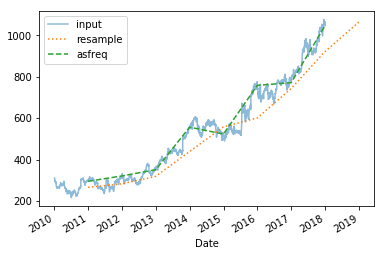

In [4]:
goog.Close.plot(alpha=0.5, style='-')
goog.Close.resample('BA').mean().plot(style=':')
goog.Close.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'])

In [5]:
goog.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999788,0.999871,0.999825,-0.599025,0.999825
Low,0.999788,1.000000,0.999796,0.999871,-0.604558,0.999871
Open,0.999871,0.999796,1.000000,0.999664,-0.600678,0.999664
Close,0.999825,0.999871,0.999664,1.000000,-0.602409,1.000000
Volume,-0.599025,-0.604558,-0.600678,-0.602409,1.000000,-0.602409
Adj Close,0.999825,0.999871,0.999664,1.000000,-0.602409,1.000000


In [6]:
ts_data = TsData.make_ts_features(goog,
                                  predictor_labels=['High', 'Low', 'Open', 'Close', 'Volume'],
                                  target_label=['Close'],
                                  goback_steps=5,
                                  period_per_step=1, 
                                  forecast_period=3,
                                  auto_feature_select=True)

/Users/jasonhu/Documents/GitHub/tftk/tftk/data.py:204: UserWarning: The time interval of your index is inconsistent ,you need to resample the data so that it satisfies the requirements
  "The time interval of your index is inconsistent ,"


In [7]:
ts_data.predictor_labels

['Close', 'Volume']

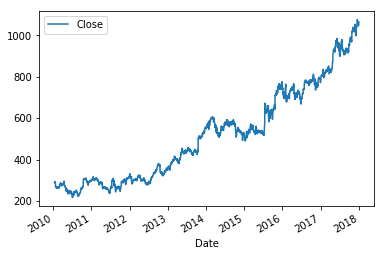

In [8]:
ts_data.ts_target.plot()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression().fit(ts_data.ts_features, ts_data.ts_target)

In [11]:
predict = reg.predict(ts_data.ts_features)

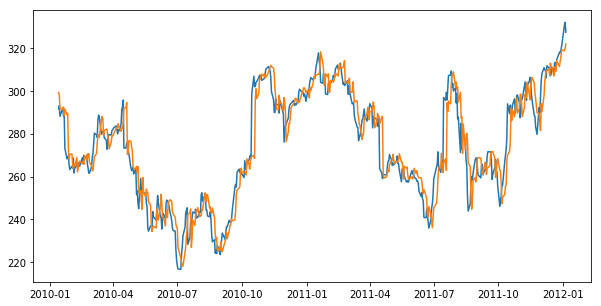

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ts_data.ts_target.iloc[:500])
ax.plot(ts_data.ts_target.iloc[:500].index, predict[:500])

In [15]:
from tftk.naive_regressor import Persist

In [16]:
ts_data = TsData.make_ts_features(goog,
                                  predictor_labels=['Close'],
                                  target_label=['Close'],
                                  goback_steps=5,
                                  forecast_period=3,
                                  period_per_step=1, 
                                  auto_feature_select=False)

/Users/jasonhu/Documents/GitHub/tftk/tftk/data.py:204: UserWarning: The time interval of your index is inconsistent ,you need to resample the data so that it satisfies the requirements
  "The time interval of your index is inconsistent ,"


In [17]:
predict = Persist.predict(ts_data.ts_features)

In [18]:
rmse = Persist.score(ts_data.ts_target.Close, predict)
rmse

13.37624556206691

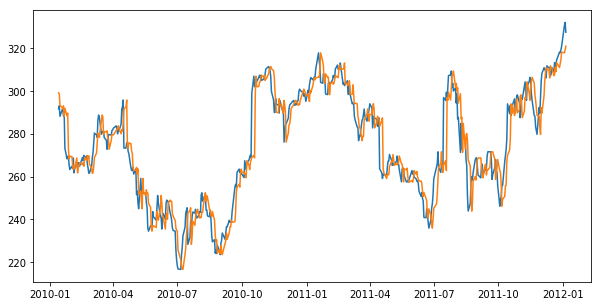

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ts_data.ts_target.iloc[:500])
ax.plot(ts_data.ts_target.iloc[:500].index, predict[:500])